<a href="https://colab.research.google.com/github/snowboarder-hk/hello-world/blob/master/learn_svc_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'Second feature**2')

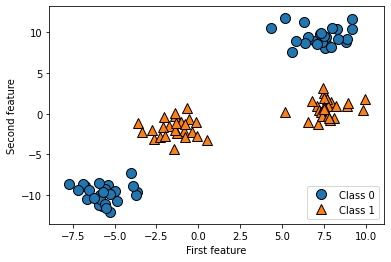

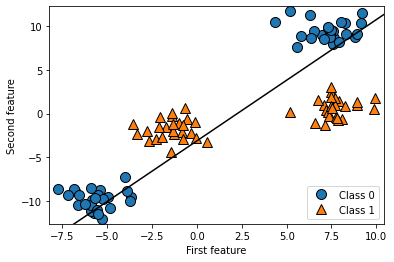

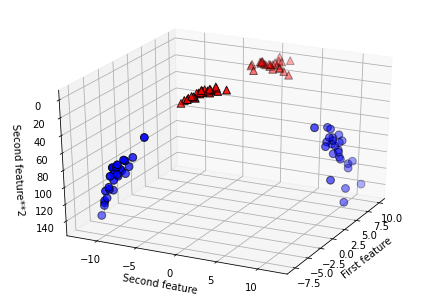

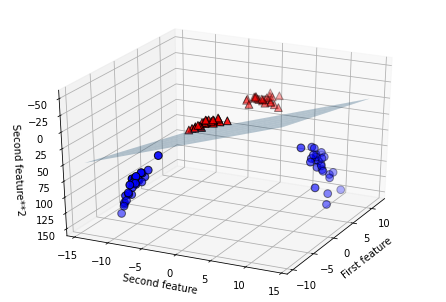

In [4]:
import pip
!pip install mglearn

import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

X,y = make_blobs(centers=4,random_state=8)
y = y%2

plt.subplots()
mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.legend(["Class 0","Class 1"],loc=4)

linear_svm = LinearSVC().fit(X,y)

plt.subplots()
mglearn.discrete_scatter(X[:,0],X[:,1],y)

w = linear_svm.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-7.5,11)
yy = a * xx - (linear_svm.intercept_[0])/w[1]

plt.plot(xx,yy,c="k")

x_min,x_max = X[:,0].min()-.5,X[:,0].max()+.5
y_min,y_max = X[:,1].min()-.5,X[:,1].max()+.5
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.legend(["Class 0","Class 1" ],loc=4)

X_new = np.hstack([X,X[:,1:]**2])

figure = plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)

mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",s=60,edgecolor="k")
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c="r",marker="^",s=60,edgecolor="k")

ax.set_xlabel("First feature")
ax.set_ylabel("Second feature")
ax.set_zlabel("Second feature**2")

linear_svm_3d = LinearSVC().fit(X_new,y)
coef,intercept = linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)

xx = np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride = 8,cstride=8,alpha=0.3)

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",s=60,edgecolor="k")
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c="r",marker="^",s=60,edgecolor="k")

ax.set_xlabel("First feature")
ax.set_ylabel("Second feature")
ax.set_zlabel("Second feature**2")